### 3 Import the required packages with their customary aliases

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 4.Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN
...,...,...,...,...
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN


### 5 How many rows and columns are in gdp_df
8219 rows and 4 columns

## What are the data types of each column?

In [3]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

### 6 Drop the Value Footnotes column 

In [4]:
gdp_df.drop(columns = 'Value Footnotes')

,Country or Area,Year,Value
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


In [5]:
gdp_df = gdp_df.drop(columns = 'Value Footnotes')

In [6]:
gdp_df

,Country or Area,Year,Value
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


## and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [7]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']

In [8]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


### 7. How many countries have data for all years? 

### below is to count how many unique years there are in the set

In [9]:
gdp_df['Year'].nunique()

34

In [77]:
gdp_df.Year.nunique()

34

In [10]:
gdp_df['Country'].value_counts()
### could also do gdp_df.value_counts('Country')

Country
Africa Eastern and Southern    34
Africa Western and Central     34
Albania                        34
Andorra                        34
Algeria                        34
                               ..
Faroe Islands                  16
Kosovo                         16
Sint Maarten (Dutch part)      15
Turks and Caicos Islands       13
Djibouti                       11
Name: count, Length: 247, dtype: int64

In [11]:
year_count=gdp_df['Country'].value_counts()

In [12]:
type(year_count)

pandas.core.series.Series

In [13]:
year_count=year_count.to_frame()

In [14]:
type(year_count)

pandas.core.frame.DataFrame

In [15]:
year_count = year_count.reset_index()

In [16]:
year_count

,Country,count
0,Africa Eastern and Southern,34
1,Africa Western and Central,34
2,Albania,34
3,Andorra,34
4,Algeria,34
...,...,...
242,Faroe Islands,16
243,Kosovo,16
244,Sint Maarten (Dutch part),15
245,Turks and Caicos Islands,13


In [17]:
year_count.loc[year_count['count'] == gdp_df['Year'].nunique()]


,Country,count
0,Africa Eastern and Southern,34
1,Africa Western and Central,34
2,Albania,34
3,Andorra,34
4,Algeria,34
...,...,...
223,Turkmenistan,34
224,Timor-Leste,34
225,Togo,34
226,Trinidad and Tobago,34


In [79]:
year_count.loc[year_count['count'] == gdp_df['Year'].nunique()].Country.to_list()
##this just pulls out the countries as a list

['Africa Eastern and Southern',
 'Africa Western and Central',
 'Albania',
 'Andorra',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Bahrain',
 'Arab World',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Belgium',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Benin',
 'Belize',
 'Bermuda',
 'Bolivia',
 'Costa Rica',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Brunei',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 "CÃ´te d'Ivoire",
 'Cabo Verde',
 'Cambodia',
 'Caribbean small states',
 'Canada',
 'Central Europe and the Baltics',
 'Central African Republic',
 'Denmark',
 'Croatia',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cyprus',
 'Dem. Rep. Congo',
 'Czechia',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific',
 'Early-demographic dividend',
 'Dominican Republic',
 'Dominica',
 'Iran',
 'Iraq',
 'Haiti',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'East Asia & Pacific (IDA 

In [19]:
len(year_count.loc[year_count['count'] == gdp_df['Year'].nunique()])

228

Which countries are missing many years of data?

In [20]:
year_count.tail(20)

,Country,count
227,Tunisia,34
228,Lebanon,33
229,Tonga,33
230,Bhutan,33
231,Syrian Arab Republic,33
232,Somalia,33
233,Greenland,32
234,West Bank and Gaza,30
235,Serbia,29
236,Montenegro,27


In [21]:
len(year_count.loc[year_count['count'] != gdp_df['Year'].nunique()])
## how many countries were missing ANY years of data

19

Look at the number of observations per year. What do you notice?

In [22]:
obs_by_year=gdp_df['Year'].value_counts()

In [23]:
obs_by_year = obs_by_year.reset_index()

In [24]:
obs_by_year.sort_values(by='Year').reset_index(drop=True)

,Year,count
0,1990,233
1,1991,234
2,1992,234
3,1993,234
4,1994,235
5,1995,236
6,1996,236
7,1997,238
8,1998,238
9,1999,238


#8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [25]:
gdp_2020 = gdp_df.loc[gdp_df.Year == 2020]

In [26]:
gdp_2020.sort_values(by='GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
1046,Burundi,2020,833.920257
1302,Central African Republic,2020,1136.570530
1734,Dem. Rep. Congo,2020,1277.632863
6699,Somalia,2020,1396.053436
5133,Mozambique,2020,1466.124765
...,...,...,...
741,Bermuda,2020,87894.401174
3493,Ireland,2020,102989.787335
6119,Qatar,2020,103061.913414
6514,Singapore,2020,115304.149459


array([[<Axes: title={'center': 'GDP_Per_Capita'}>]], dtype=object)

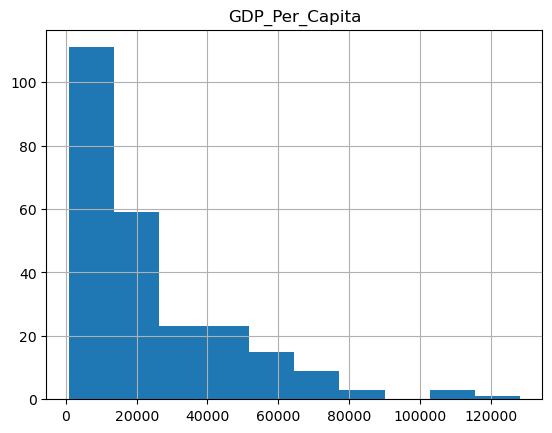

In [27]:
gdp_2020.hist('GDP_Per_Capita')

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

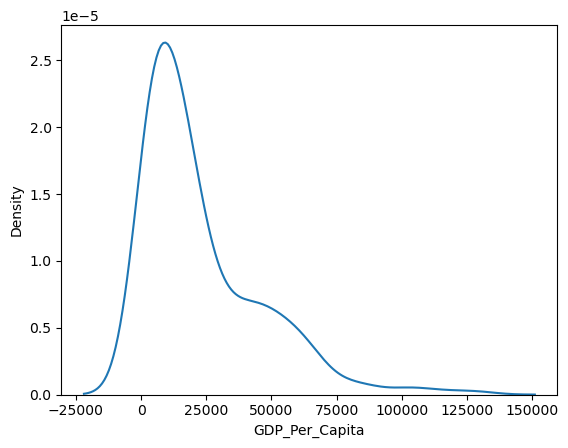

In [28]:
sns.kdeplot(data=gdp_2020, x='GDP_Per_Capita')

<Axes: xlabel='GDP_Per_Capita'>

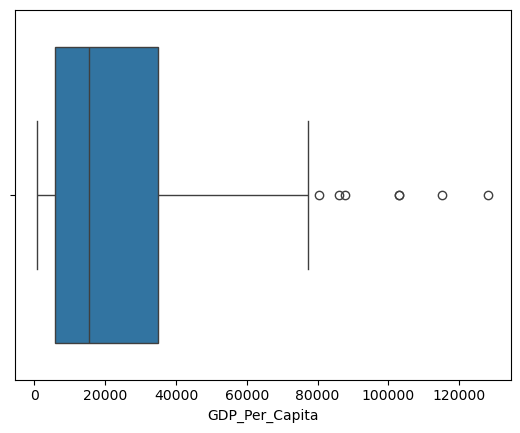

In [29]:
sns.boxplot(data=gdp_2020, x ='GDP_Per_Capita')

<Axes: xlabel='GDP_Per_Capita'>

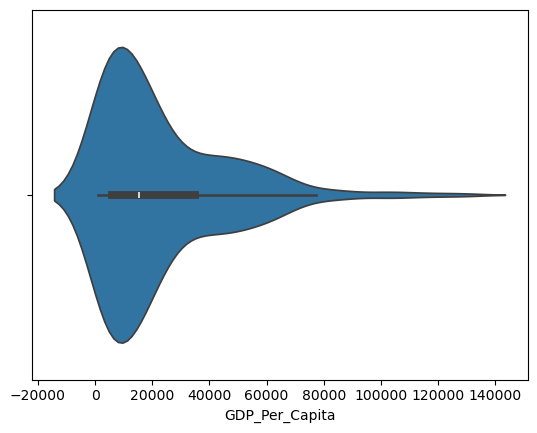

In [30]:
sns.violinplot(data =gdp_2020, x='GDP_Per_Capita')

There are way more countries with lower gdps than higher, which you can see from all of hte plots. The violin plot and the density plots have data going below 0, which isn't helpful in this data set. The box plot I think is best in terms of showing the data as a whole with the 25%,75% as well as outliers, which there are cleary a few.

#9. What was the median GDP per capita value in 2020?

In [31]:
gdp_2020['GDP_Per_Capita'].median()

15309.23598817024

In [80]:
gdp_2020.GDP_Per_Capita.median()

15309.23598817024

#10 For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades.

In [32]:
gdp_decades=gdp_df.loc[((gdp_df.Year == 1990)|(gdp_df.Year == 2000)|(gdp_df.Year == 2010)|(gdp_df.Year == 2020))]

In [33]:
gdp_decades

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
13,Afghanistan,2010,2848.586061
23,Afghanistan,2000,1617.826475
27,Africa Eastern and Southern,2020,3861.111238
37,Africa Eastern and Southern,2010,3863.836012
...,...,...,...
8184,Zambia,1990,2425.111287
8188,Zimbabwe,2020,2987.269823
8198,Zimbabwe,2010,2572.769992
8208,Zimbabwe,2000,4071.022001


In [34]:
#another way to do the same thing
decades = [1990,2000,2010,2020]
gdp_decades_2 = gdp_df.loc[gdp_df['Year'].isin(decades)]

In [35]:
gdp_decades_2

,Country,Year,GDP_Per_Capita
3,Afghanistan,2020,2769.685745
13,Afghanistan,2010,2848.586061
23,Afghanistan,2000,1617.826475
27,Africa Eastern and Southern,2020,3861.111238
37,Africa Eastern and Southern,2010,3863.836012
...,...,...,...
8184,Zambia,1990,2425.111287
8188,Zimbabwe,2020,2987.269823
8198,Zimbabwe,2010,2572.769992
8208,Zimbabwe,2000,4071.022001


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

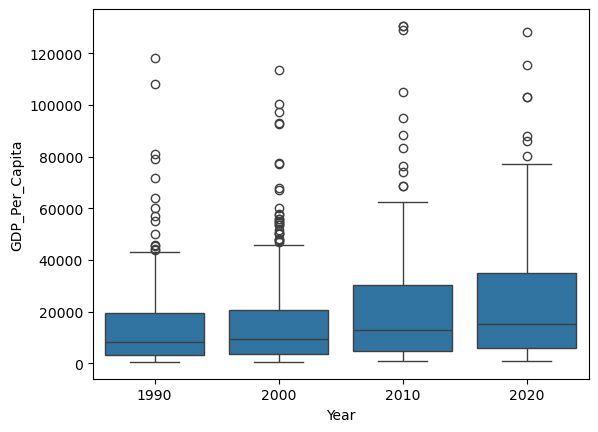

In [36]:
sns.boxplot(x = gdp_decades['Year'], y =gdp_decades['GDP_Per_Capita'])


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

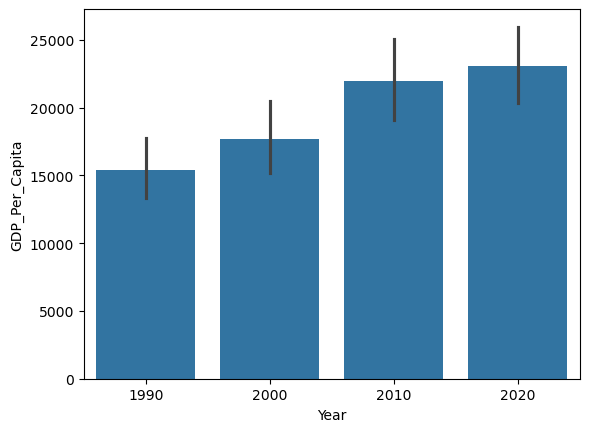

In [37]:
sns.barplot(x='Year', y='GDP_Per_Capita',data=gdp_decades)


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

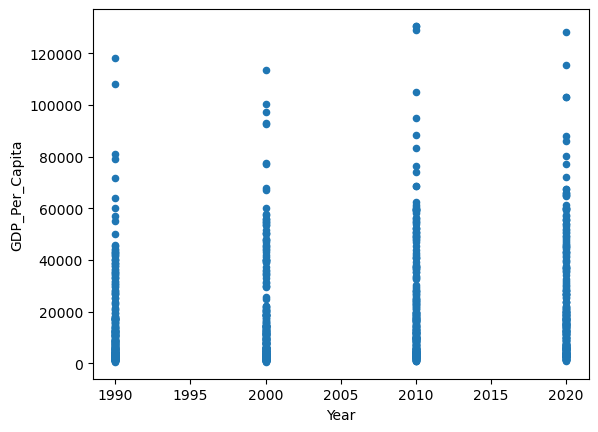

In [38]:
gdp_decades.plot(kind='scatter', x='Year', y='GDP_Per_Capita')

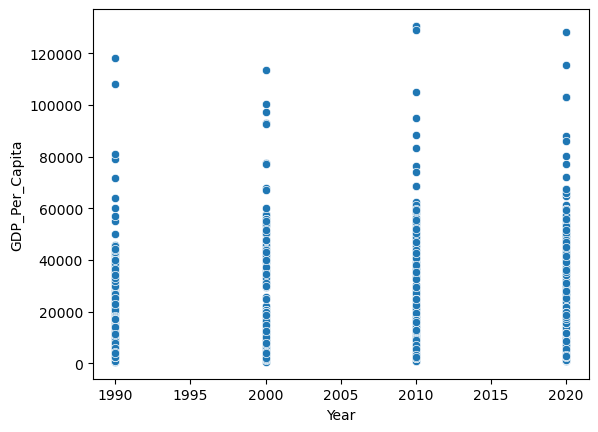

In [39]:
sns.scatterplot(data = gdp_decades, x ='Year', y= 'GDP_Per_Capita');

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

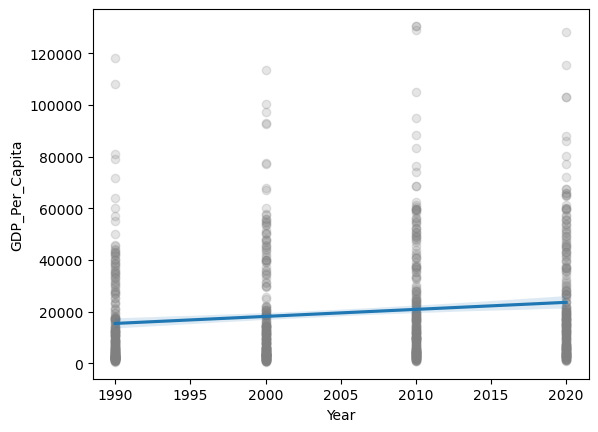

In [40]:
sns.regplot(data=gdp_decades, x='Year', y='GDP_Per_Capita',
            scatter_kws = {'color' : 'grey' , 'alpha' : 0.2})


GDP has slowly increased over time, which each graph shows in its own way.The barplot and boxplot are pretty clear. The scatterplot less so, but the version with the trend line helps.

#11.Which country was the first to have a GDP per capita greater than $100,000?

In [41]:
gdp_df.GDP_Per_Capita > 100000


0       False
1       False
2       False
3       False
4       False
        ...  
8214    False
8215    False
8216    False
8217    False
8218    False
Name: GDP_Per_Capita, Length: 8219, dtype: bool

In [42]:
gdp_df.loc[gdp_df.GDP_Per_Capita > 100000].sort_values('Year')
#either Brunei or United Arab Emirates

,Country,Year,GDP_Per_Capita
974,Brunei,1990,118163.683198
7827,United Arab Emirates,1990,108057.042464
7826,United Arab Emirates,1991,103098.537132
973,Brunei,1991,118220.683619
972,Brunei,1992,111457.220910
...,...,...,...
4457,"Macao SAR, China",2023,104961.643485
3490,Ireland,2023,115401.125283
4423,Luxembourg,2023,130373.477942
6511,Singapore,2023,127543.554752


#12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [111]:
highest_gdp_2020 = gdp_df.loc[gdp_df.Year == 2020].sort_values('GDP_Per_Capita', ascending =False).head(1).Country
#Luxembourg

In [112]:
highest_gdp_2020

4426    Luxembourg
Name: Country, dtype: object

In [109]:
gdp_df.Country.isin(highest_gdp_2020)

0       False
1       False
2       False
3       False
4       False
        ...  
8214    False
8215    False
8216    False
8217    False
8218    False
Name: Country, Length: 8219, dtype: bool

In [114]:
#same as above
gdp_df['Country'].isin(highest_gdp_2020)

0       False
1       False
2       False
3       False
4       False
        ...  
8214    False
8215    False
8216    False
8217    False
8218    False
Name: Country, Length: 8219, dtype: bool

In [116]:
lux = gdp_df.loc[gdp_df.Country.isin(highest_gdp_2020)].sort_values('Year').reset_index(drop=True)

<Axes: xlabel='Year'>

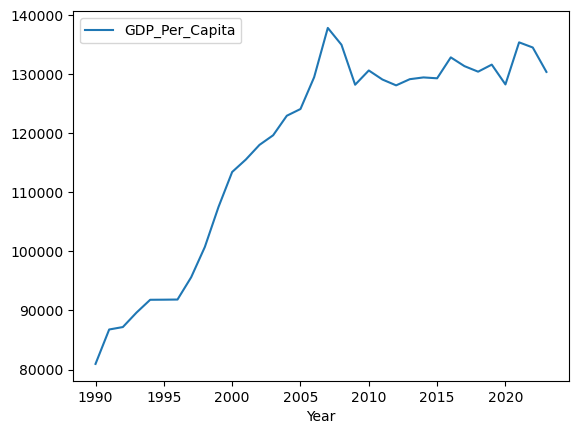

In [45]:
gdp_df.loc[gdp_df.Country == 'Luxembourg'].plot(x='Year',y='GDP_Per_Capita',kind='line')



<Axes: xlabel='Year'>

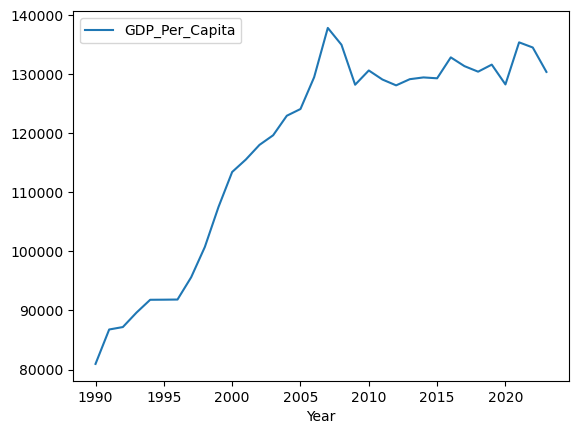

In [117]:
gdp_df.loc[gdp_df.Country.isin(highest_gdp_2020)].sort_values('Year').reset_index(drop=True).plot(x='Year',y='GDP_Per_Capita',kind='line')

## 13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [118]:
lowest_gdp = gdp_2020.sort_values('GDP_Per_Capita').Country.head(1)

In [119]:
lowest_gdp

1046    Burundi
Name: Country, dtype: object

In [47]:
lowest_over_time = gdp_df.loc[gdp_df.Country.isin(lowest_gdp)]

(0.0, 1466.1674858591664)

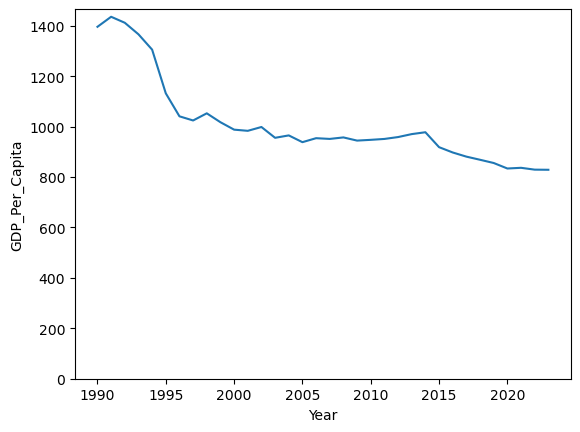

In [48]:
sns.lineplot(data= lowest_over_time, x = 'Year', y = 'GDP_Per_Capita')
plt.ylim(bottom = 0)

#14. Read in the internet use dataset into a DataFrame named internet_df. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [49]:
internet_df = pd.read_csv('../data/internet_use.csv',nrows = 6083)

In [50]:
internet_df = internet_df.drop(columns = 'Value Footnotes')

In [51]:
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']

In [52]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


### 16. Look at the number of observations in this dataset per year. What do you notice?

In [53]:
internet_df.Year.value_counts()

Year
1990    226
2007    217
2002    214
2008    214
2009    214
2011    214
2001    212
2006    212
2005    212
2000    210
2004    210
2012    209
2010    209
2003    208
1999    207
2016    206
2017    205
2014    204
2015    203
2013    203
1998    195
1997    188
2020    186
2021    186
2019    185
2022    184
1996    177
2018    174
1995    141
1994     92
1993     66
1992     50
1991     39
2023     11
Name: count, dtype: int64

#17. What is the first year to have a non-zero internet users percentage value?

In [54]:
internet_df.loc[internet_df.Internet_Users_Pct > 0].sort_values('Year')

,Country,Year,Internet_Users_Pct
4197,Norway,1990,0.707299
2829,Italy,1990,0.017545
3980,Netherlands (Kingdom of the),1990,0.334387
2192,Germany,1990,0.125892
2796,Israel,1990,0.110774
...,...,...,...
3141,Latvia,2023,92.187900
677,Bosnia and Herzegovina,2023,83.377200
427,Bangladesh,2023,44.502700
5266,Sweden,2023,95.703300


## 18. How does the distribution of internet users percent differ for 2000 and 2014?

In [55]:
internet_years = [2000,2014]

In [58]:
internet_2000_14 = internet_df[internet_df.Year.isin(internet_years)]

In [59]:
internet_2000_14

,Country,Year,Internet_Users_Pct
5,Afghanistan,2014,7.000000
28,Albania,2014,54.300000
42,Albania,2000,0.114097
57,Algeria,2014,29.500000
71,Algeria,2000,0.491706
...,...,...,...
6017,Yemen,2000,0.082500
6031,Zambia,2014,6.500000
6045,Zambia,2000,0.191072
6061,Zimbabwe,2014,16.364700


<Axes: xlabel='Year', ylabel='Internet_Users_Pct'>

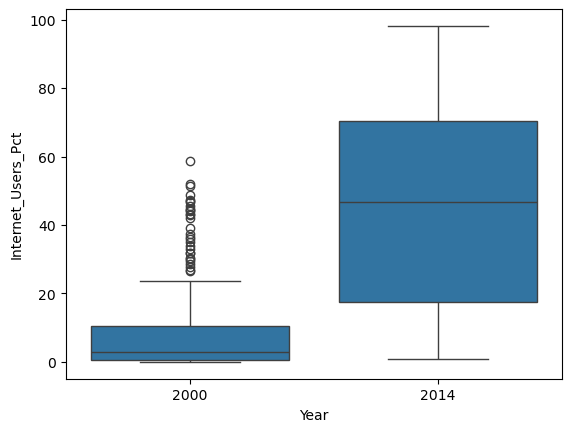

In [60]:
sns.boxplot( data = internet_2000_14, x ='Year', y = 'Internet_Users_Pct')

# 19.For how many countries was the percentage of internet users below 5% in 2014?

In [61]:
internet_2014 =internet_df.loc[internet_df.Year ==2014]

In [62]:
len(internet_2014.loc[internet_2014.Internet_Users_Pct < 5])

10

#20 Merge the two DataFrames to one. Do this in a way that keeps all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use. Look at the first and last few rows to confirm that it merged correctly.

In [64]:
gdp_and_internet_use =pd.merge(gdp_df, internet_df, on = ["Country","Year"])

In [65]:
top_3 = internet_2014.sort_values('Internet_Users_Pct', ascending =False).Country.head(3)

In [66]:
top_3_gdp_internet = gdp_and_internet_use.loc[gdp_and_internet_use.Country.isin(top_3)]

#21 Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

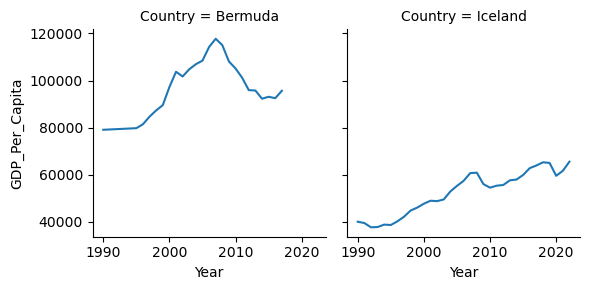

In [71]:
g = sns.FacetGrid(top_3_gdp_internet, col = 'Country')
g.map(sns.lineplot,'Year', 'GDP_Per_Capita')

#22. Subset gdp_and_internet_use to just the year 2014. Save this as a new dataframe named gdp_and_internet_use_2014.

In [73]:
g_and_i_2014 = gdp_and_internet_use.loc[gdp_and_internet_use.Year == 2014]

#23 Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

<Axes: xlabel='GDP_Per_Capita', ylabel='Internet_Users_Pct'>

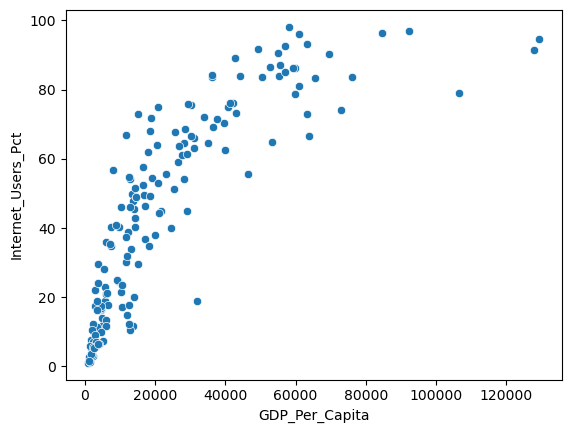

In [76]:
sns.scatterplot(data = g_and_i_2014, x = 'GDP_Per_Capita', y = 'Internet_Users_Pct')

#. 24 Stretch Question: Use the qcut function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in gdp_per_capita_2014 into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".